In [1]:
import sys
sys.path.append("../../Pytorch-template")

import time
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import train
import train_lightning
import torchtrainer
import numpy as np
import torchtrainer.models

torch.cuda.empty_cache()

params = {
    # Dataset
    'img_dir': Path('/home/fonta42/Desktop/IC/Codigos/maximum_projection/images/'),
    'label_dir': Path('/home/fonta42/Desktop/IC/Codigos/maximum_projection/labels'),
    'crop_size': (256, 256),          
    'train_val_split': 0.1,
    'use_transforms': False,
    # Model
    'model_layers': (1, 2, 3), 
    'model_channels': (8,16,32), 
    'use_unet': True,
    # Training
    'epochs': 2,
    'lr': 0.01,
    'batch_size_train': 1,
    'batch_size_valid': 1, #132,
    'momentum': 0.9,
    'weight_decay': 0.,
    'seed': 12,
    'loss': 'cross_entropy',
    'scheduler_power': 0.9,
    'class_weights': (0.367, 0.633),
    # Efficiency
    'device': 'cuda',
    'num_workers': 3,
    'use_amp': True,
    'pin_memory': False,
    'non_blocking': False,
    # Logging
    'log_dir': 'logs',
    'experiment':'version_1',
    'save_best':True,
    # Other
    'resume': False,
    'checkpoint_file': '/home/fonta42/Desktop/IC/Codigos/Pytorch-template/logs/version_1/checkpoint_best.pth',
}

#t0 = time.time()
#Train using pure Pytorch
logger, ds_train, ds_valid, model = train.run(params)
#Train using Pytorch Lightning
#ds_train, ds_valid, model, trainer = train_lightning.run(params)
#print(time.time()-t0)

Epoch 1/2
Batch 1/2045, Train loss: 1.8267688751220703
Batch 2/2045, Train loss: 1.571297526359558
Batch 3/2045, Train loss: 3.2509658336639404
Batch 4/2045, Train loss: 1.6239566802978516
Batch 5/2045, Train loss: 0.9452852010726929
Batch 6/2045, Train loss: 0.8300182223320007
Batch 7/2045, Train loss: 0.7778730988502502
Batch 8/2045, Train loss: 0.6259714961051941
Batch 9/2045, Train loss: 0.5910341143608093
Batch 10/2045, Train loss: 0.674588143825531
Batch 11/2045, Train loss: 0.6403034329414368
Batch 12/2045, Train loss: 0.6167013049125671
Batch 13/2045, Train loss: 0.5682018995285034
Batch 14/2045, Train loss: 0.5942904949188232
Batch 15/2045, Train loss: 0.5200422406196594
Batch 16/2045, Train loss: 0.556160569190979
Batch 17/2045, Train loss: 0.48368194699287415
Batch 18/2045, Train loss: 0.5198001861572266
Batch 19/2045, Train loss: 0.46228259801864624
Batch 20/2045, Train loss: 0.4431261718273163
Batch 21/2045, Train loss: 0.4331153631210327
Batch 22/2045, Train loss: 0.52760

KeyboardInterrupt: 

In [2]:
stats = []
with torch.no_grad():
    for idx, (x, y) in enumerate(ds_valid):
        output = model(x[None].to('cuda'))[0].to('cpu')
        stats.append((idx, output.min(), output.max()))
stats
# Verifica range dos valores

[(0, tensor(-46.8716), tensor(17.9357)),
 (1, tensor(-28.4167), tensor(11.9127)),
 (2, tensor(-46.1089), tensor(16.0240)),
 (3, tensor(-60.8304), tensor(19.3974)),
 (4, tensor(-52.3128), tensor(16.4058)),
 (5, tensor(-53.3507), tensor(15.0105)),
 (6, tensor(-52.6446), tensor(20.4555)),
 (7, tensor(-55.5199), tensor(17.0690)),
 (8, tensor(-49.8617), tensor(20.9274)),
 (9, tensor(-26.6027), tensor(10.6214)),
 (10, tensor(-41.3367), tensor(16.2724)),
 (11, tensor(-44.1429), tensor(16.6984)),
 (12, tensor(-124.2749), tensor(44.2840)),
 (13, tensor(-49.9071), tensor(17.6324)),
 (14, tensor(-63.8271), tensor(21.4841)),
 (15, tensor(-41.0974), tensor(15.0232)),
 (16, tensor(-41.0727), tensor(12.1806)),
 (17, tensor(-56.7460), tensor(20.7298)),
 (18, tensor(-45.0616), tensor(17.3958)),
 (19, tensor(-44.5737), tensor(17.6810)),
 (20, tensor(-42.7402), tensor(15.8898)),
 (21, tensor(-42.8685), tensor(16.0937)),
 (22, tensor(-36.2503), tensor(14.9631)),
 (23, tensor(-27.0200), tensor(10.0279)),
 

In [3]:
model.eval()
model.to('cuda')
stats = []
with torch.no_grad():
    for idx, (x, y) in enumerate(ds_valid):
        output = model(x[None].to('cuda')).to('cpu')
        acc = torchtrainer.perf_funcs.segmentation_accuracy(output, y[None], ('iou', 'prec', 'rec'))
        stats.append((idx, *list(acc.items())))
stats

[(0,
  ('iou', tensor(0.8293)),
  ('prec', tensor(0.9511)),
  ('rec', tensor(0.8662))),
 (1,
  ('iou', tensor(0.5856)),
  ('prec', tensor(0.5902)),
  ('rec', tensor(0.9869))),
 (2,
  ('iou', tensor(0.8057)),
  ('prec', tensor(0.8196)),
  ('rec', tensor(0.9795))),
 (3,
  ('iou', tensor(0.6348)),
  ('prec', tensor(0.7567)),
  ('rec', tensor(0.7976))),
 (4,
  ('iou', tensor(0.8405)),
  ('prec', tensor(0.8701)),
  ('rec', tensor(0.9611))),
 (5,
  ('iou', tensor(0.6845)),
  ('prec', tensor(0.7117)),
  ('rec', tensor(0.9470))),
 (6,
  ('iou', tensor(0.8011)),
  ('prec', tensor(0.8290)),
  ('rec', tensor(0.9598))),
 (7,
  ('iou', tensor(0.8418)),
  ('prec', tensor(0.8833)),
  ('rec', tensor(0.9471))),
 (8,
  ('iou', tensor(0.7837)),
  ('prec', tensor(0.8310)),
  ('rec', tensor(0.9322))),
 (9,
  ('iou', tensor(0.6202)),
  ('prec', tensor(0.6697)),
  ('rec', tensor(0.8934))),
 (10,
  ('iou', tensor(0.8796)),
  ('prec', tensor(0.9224)),
  ('rec', tensor(0.9499))),
 (11,
  ('iou', tensor(0.8344))

/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/li

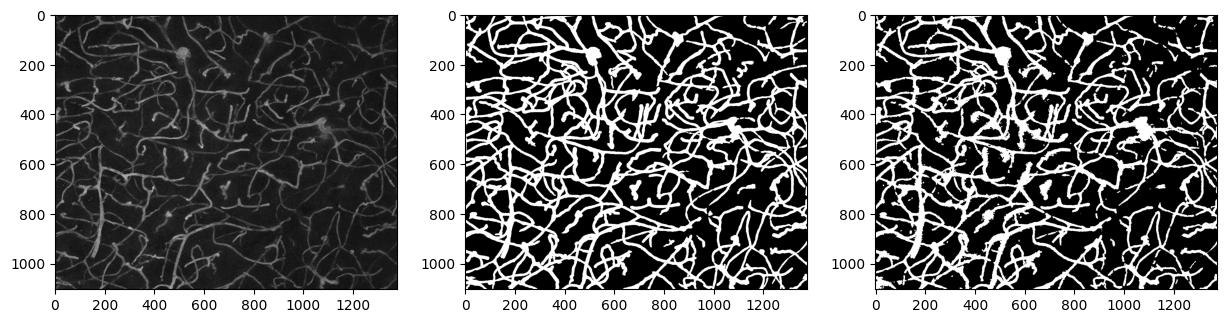

In [4]:
x, y = ds_valid[0]
with torch.no_grad():
    output = model(x[None].to('cuda'))[0].to('cpu')
res = output.max(dim=0)[1]

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(x[0], 'gray')
plt.subplot(1, 3, 2)
plt.imshow(y, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(res, 'gray')

In [5]:
insp = torchtrainer.inspector.Inspector(model)
#params = insp.get_params()
insp.start_tracking_activations()

model.eval()
model.to('cuda')
with torch.no_grad():
    with torch.cuda.amp.autocast(enabled=True):
        output = model(ds_valid[0][0][None].to('cuda'))
acts = insp.get_activations()

In [6]:
model = torchtrainer.models.resnet_seg.ResNetSeg((3,3,3,3,3), (16,32,64,32,16))
#torchtrainer.profiling.benchmark_model(model, (8, 1, 1104, 1376), no_grad=True, call_backward=False, use_float16=True)
torchtrainer.profiling.benchmark_model(model, (8, 1, 256, 256), no_grad=False, call_backward=True, use_float16=True, return_model_info=True)

Unsupported operator aten::add_ encountered 50 time(s)
Unsupported operator aten::batch_norm encountered 35 time(s)
Unsupported operator aten::add_ encountered 50 time(s)


{'params': 0.356336,
 'activations': 0.588251136,
 'flops': 188.584296448,
 'memory': 2.095923900604248,
 'time_cpu': 0.010400772094726562,
 'time_gpu': 0.21158808898925782,
 'info': ['params: M',
  'activations: G',
  'flops: G',
  'memory: GiB',
  'time_cpu: s',
  'time_gpu: s']}

In [7]:
stats = []
for k, v in acts.items():
    if v is not None:
        stats.append((k, v.min(), v.max()))
stats

[('resunet.conv1',
  tensor(-11.3672, dtype=torch.float16),
  tensor(17.5469, dtype=torch.float16)),
 ('resunet.bn1',
  tensor(-8.7344, dtype=torch.float16),
  tensor(7.6211, dtype=torch.float16)),
 ('resunet.relu',
  tensor(0., dtype=torch.float16),
  tensor(7.6211, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.conv1',
  tensor(-8.4922, dtype=torch.float16),
  tensor(8.3516, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.bn1',
  tensor(-9.7500, dtype=torch.float16),
  tensor(7.6172, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.relu1',
  tensor(0., dtype=torch.float16),
  tensor(7.6172, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.conv2',
  tensor(-10.3438, dtype=torch.float16),
  tensor(9.5938, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.bn2',
  tensor(-8.6328, dtype=torch.float16),
  tensor(8.7969, dtype=torch.float16)),
 ('resunet.encoder.stage_0.0.relu2',
  tensor(0., dtype=torch.float16),
  tensor(14.4844, dtype=torch.float16)),
 ('resunet.encoder.

In [8]:
from dataset import create_datasets
import lightning.pytorch as pl
pl.seed_everything(12, workers=True)
ds_train, ds_valid, _ = create_datasets(params['img_dir'], params['label_dir'], params['crop_size'], params['train_val_split'], use_simple=not params['use_transforms'])
img, _ = ds_valid[210]
img_or, _ = ds_valid.get_item(210)

Global seed set to 12


In [9]:
import os
from PIL import Image
import numpy as np
import cv2

root = '/home/fonta42/Desktop/IC/Codigos/maximum_projection/images/'
files = os.listdir(root)
clahe_mat = cv2.createCLAHE(clipLimit=3., tileGridSize=(16, 16))
bins = range(257)
hists = []
mean = 0
std = 0
for idx, file in enumerate(files):
    img = np.array(Image.open(root+'/'+file))
    #img_res = clahe_mat.apply(img)
    mean += img.mean()
    std += img.std()

In [10]:
load_pl = False

if load_pl:
    import train_lightning
    model = train_lightning.LitSeg.load_from_checkpoint("/home/fonta42/Desktop/IC/Codigos/Pytorch-template/logs/version_1/checkpoint_best.pth")
    model.to('cuda')
    model.eval()
else:
    checkpoint = torch.load('/home/fonta42/Desktop/IC/Codigos/Pytorch-template/logs/version_1/checkpoint_best.pth')
    model = torchtrainer.models.resunet.ResUNet(params['model_layers'], params['model_channels'])
    model.to('cuda')
    model.load_state_dict(checkpoint["model"])
    model.eval();


/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fonta42/anaconda3/envs/torchtrainer/li

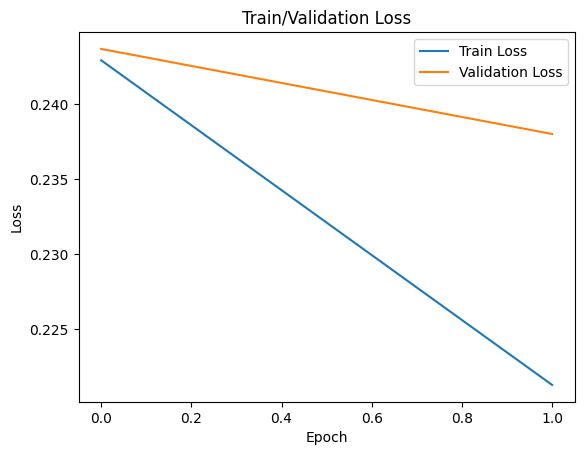

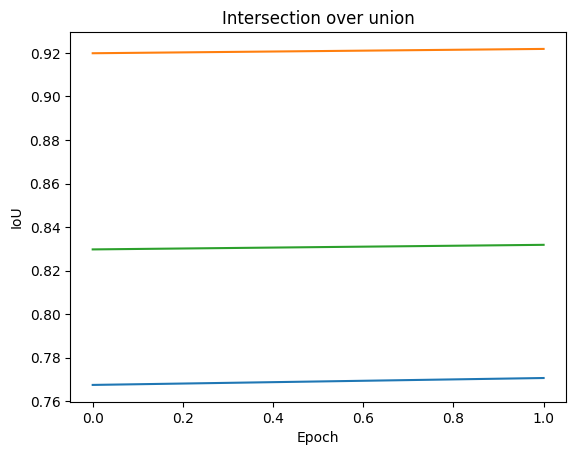

In [11]:
epochs, data = zip(*logger.data.items())
tl, vl, iou, rc, pr = zip(*data)
plt.figure()
plt.plot(tl, label='Train Loss')
plt.plot(vl, label='Validation Loss')
plt.legend()
plt.title("Train/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.figure()
plt.plot(iou, label='IoU')
plt.plot(pr, label='Precision')
plt.plot(rc, label='Recall')
plt.title("Intersection over union")
plt.xlabel("Epoch")
plt.ylabel("IoU")

_ = plt.show()

In [12]:
checkpoint = torch.load("/home/fonta42/Desktop/IC/Codigos/Pytorch-template/logs/version_1/checkpoint_best.pth")
model.to('cpu')
model.load_state_dict(checkpoint["model"])
model.eval()
img, label = ds_valid[0]
with torch.no_grad():
    res = model(img[None])[0]
    pred_label = res.argmax(dim=0)

/tmp/ipykernel_3087/2568599040.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./original_image.png',orientation ='landscape', transparent = True)
/tmp/ipykernel_3087/2568599040.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./original_image.png',orientation ='landscape', transparent = True)
/tmp/ipykernel_3087/2568599040.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./original_image.png',orientation ='landscape', transparent = True)
/tmp/ipykernel_3087/2568599040.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch

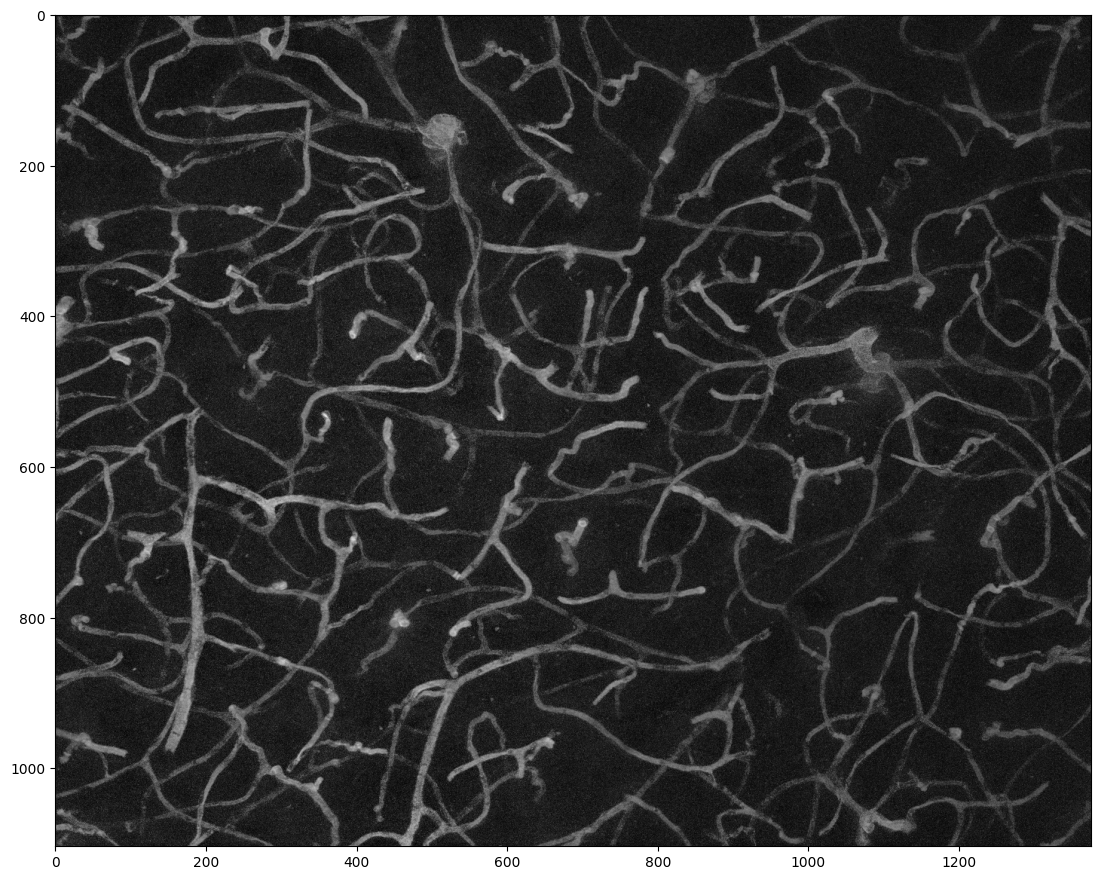

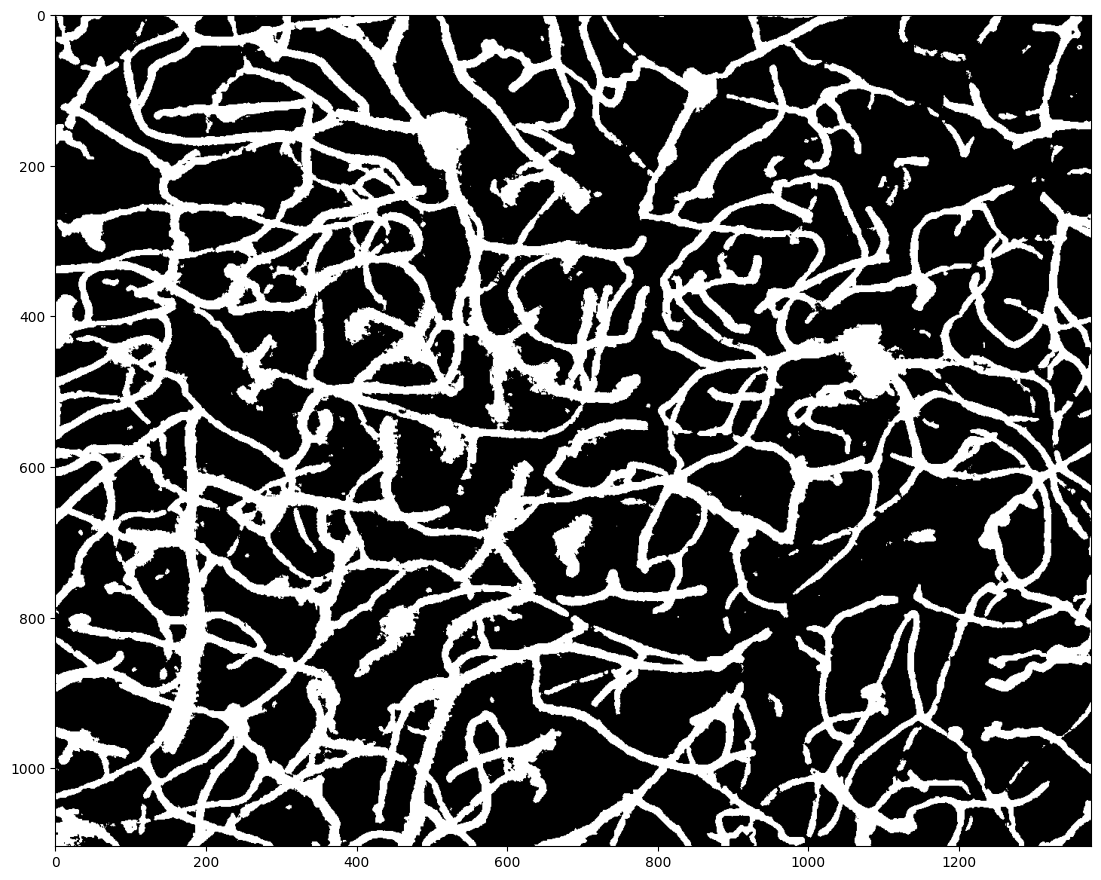

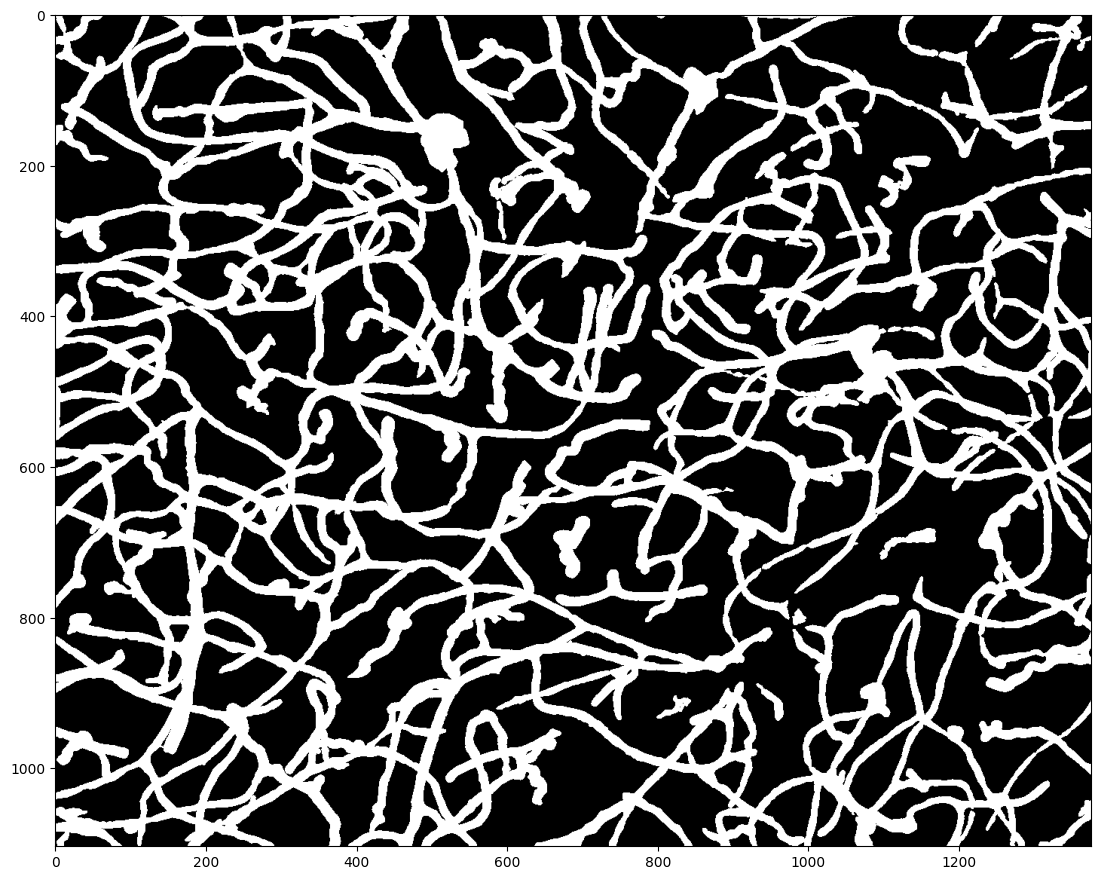

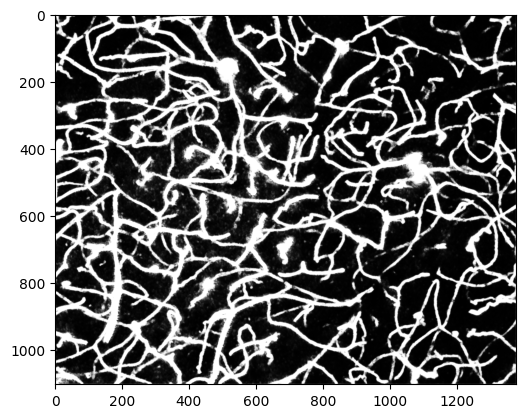

In [13]:
plt.figure(figsize=[19.2, 10.8])
plt.imshow(img[0], 'gray')
plt.savefig('./original_image.png',orientation ='landscape', transparent = True)
plt.figure(figsize=[19.2, 10.8])
plt.imshow(pred_label, 'gray', vmin=0, vmax=1)
plt.savefig('./neural_net_prediction.png',orientation ='landscape',transparent = True)
plt.figure(figsize=[19.2, 10.8])
plt.imshow(label, 'gray', vmin=0, vmax=1)
plt.savefig('./ground_truth.png',orientation ='landscape', transparent = True)
plt.figure()
plt.imshow(torch.nn.functional.softmax(res, dim=0)[1], 'gray', vmin=0, vmax=1)

/tmp/ipykernel_3087/417058374.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('segmentation_example.png', transparent=True)
/tmp/ipykernel_3087/417058374.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('segmentation_example.png', transparent=True)
/tmp/ipykernel_3087/417058374.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('segmentation_example.png', transparent=True)
/tmp/ipykernel_3087/417058374.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported as of 3.3 and will become an

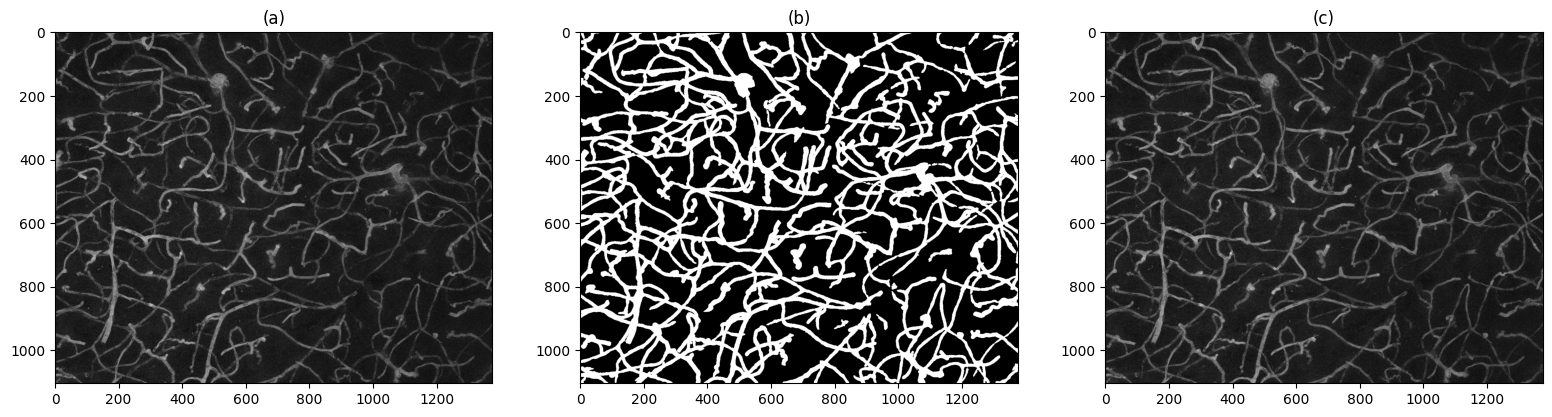

In [14]:
plt.figure(figsize=([19.2, 10.8]))

plt.subplot(2, 3, 1)
plt.title('(a)')
plt.imshow(img[0], 'gray')
plt.title('(a)')
plt.subplot(2, 3, 2)
plt.imshow(label, 'gray', vmin=0, vmax=1)
plt.title('(b)')
plt.subplot(2, 3, 3)
plt.title('(c)')
plt.imshow(pred_label, 'gray', vmin=0, vmax=1)
plt.imshow(img[0], 'gray')

plt.savefig('segmentation_example.png', transparent=True)

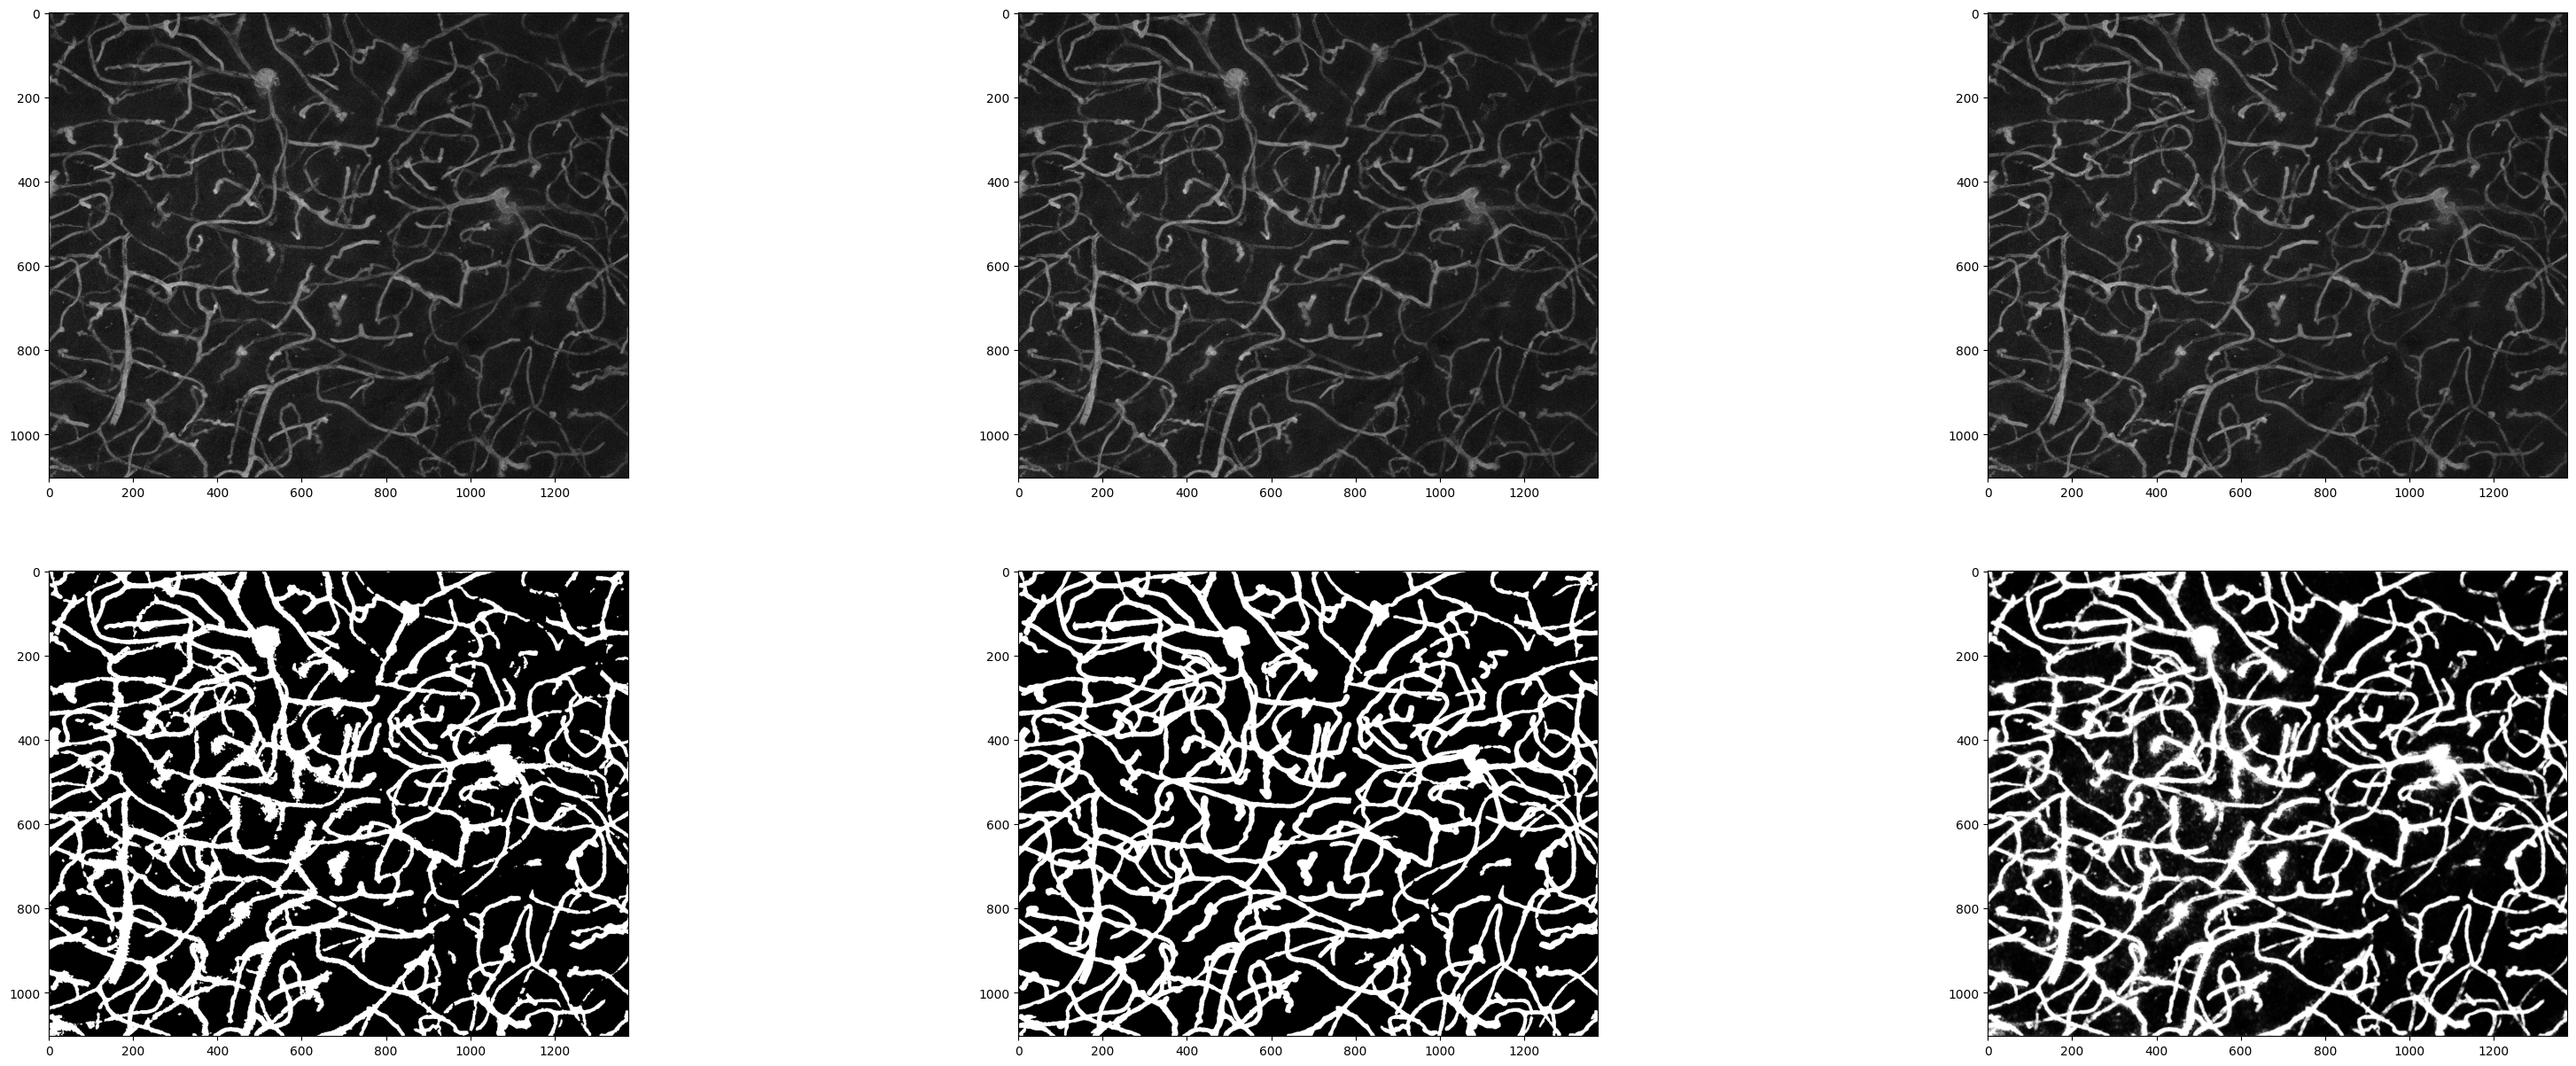

In [15]:
plt.figure(figsize=([40,15]))

plt.subplot(2, 3, 1)
plt.imshow(img[0], 'gray')
plt.subplot(2, 3, 2)
plt.imshow(img[0], 'gray')
plt.subplot(2, 3, 3)
plt.imshow(img[0], 'gray')

plt.subplot(2, 3, 4)
plt.imshow(pred_label, 'gray')
plt.subplot(2, 3, 5)
plt.imshow(label, 'gray')
plt.subplot(2, 3, 6)
plt.imshow(torch.nn.functional.softmax(res, dim=0)[1], 'gray')
plt.show()

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np

from torchvision import models
from torchvision import transforms

from captum.attr import visualization as viz
from captum.attr import LayerGradCam, FeatureAblation, LayerActivation, LayerAttribution

In [17]:
model

ResUNet(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (encoder): ModuleDict(
    (stage_0): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(8, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(8, 8, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (stage_1): Sequential(
      (0): B

In [27]:
def agg_segmentation_wrapper(inp):
    model_out = model(inp)[0].to('cpu')
    out_max = model_out.max(dim=0)[1]
    # Creates binary matrix with 1 for original argmax class for each pixel
    # and 0 otherwise. Note that this may change when the input is ablated
    # so we use the original argmax predicted above, out_max.
    selected_inds = torch.zeros_like(model_out[1]).scatter_(1, out_max, 1)
    return (model_out * selected_inds).sum(dim=(1,2))

In [28]:
lgc = LayerGradCam(agg_segmentation_wrapper, model.encoder.stage_0[0].conv1)

In [29]:
model_out = model(x[None].to('cpu'))[0].to('cpu')
model_out[1].shape

torch.Size([1104, 1376])

In [21]:
#torch.zeros_like(model_out[0:1]).scatter_(1, model_out.max(dim=0)[1], 1)
out_max = model_out.max(dim=0)[1]

out_max.shape

torch.Size([1104, 1376])

In [34]:
gc_attr = lgc.attribute(x[None].to('cpu'))

In [38]:
x[None].to('cpu')[0][0].shape

torch.Size([1104, 1376])

In [39]:
upsampled_gc_attr = LayerAttribution.interpolate(gc_attr,x[None].to('cpu')[0][0].shape)
print("Upsampled Shape:",upsampled_gc_attr.shape)

Upsampled Shape: torch.Size([1, 1, 1104, 1376])


In [40]:
viz.visualize_image_attr_multiple(upsampled_gc_attr[0].cpu().permute(1,2,0).detach().numpy(),original_image=x[None].to('cpu')[0][0].permute(1,2,0).numpy(),signs=["all", "positive", "negative"],methods=["original_image", "blended_heat_map","blended_heat_map"])

NameError: name 'preproc_img' is not defined